# Comparing Networks

In this notebook, we want to compare different network to each other.
This one focuses on...

- Generator Machine Unlearning*$^1$

There will be a notebook for every approx. MU algorithm

*$^1$ GEMU: The implemented algorithm is not the same as the one in the paper. While the paper focused on unlearning specific classes, we are training to unlearn a subset of a class, tied together by a feature, which distinguish it from the rest.

### ! Make sure that Trained, Exact, Untrained Model types are trained !

In [8]:
import os
import sys

# Add the parent directory to sys.path
sys.path.append(os.path.join('..', 'src'))

import torch
import copy
from PIL import Image
import numpy as np
# from helper import get_model TODO Muss überarbeitet werden
from mlp_dataclass import MNIST_CostumDataset, TwoLayerPerceptron, ConvNet
from training import main, train_n_models
from helper import load_models_dict

USED_DATASET = "fashion_mnist"
# OUT OF: ["mnist", "cmnist", "fashion_mnist"]

#########################
ALLREADY_TRAINED = False # <--- The Switch
#########################

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

all_data = MNIST_CostumDataset(
    sample_mode="all",
    train= True,
    test = True,
    dataset_name = USED_DATASET,
    download=True,
)

unlearned_data = MNIST_CostumDataset(
    sample_mode="only_erased",
    train= True,
    test = False,
    dataset_name = USED_DATASET,
    download=True,
)
len(unlearned_data)

2097

In [9]:
def prepare_sample(path:str):
    """preps sample to pass to model, transforms to tensor, reshape to 784, shaping it as batch"""
    sample = Image.open(path).convert("L")
    sample = torch.Tensor(np.array(sample)).reshape(784)
    
    return sample.unsqueeze(0)

def show_sample(sample:torch.Tensor):
    """Converts the sample to a numpy array and reshapes it to a 28x28 image"""
    sample = sample.reshape(28, 28)
    sample = sample.numpy()
    sample = Image.fromarray(sample)
    return sample

____

### Untrained Model

In [10]:
if USED_DATASET in ["mnist", "fashion_mnist"]:
    untrained_showcase_all= TwoLayerPerceptron()
if USED_DATASET in ["cmnist"]:
    untrained_showcase_all = ConvNet()
name = str(untrained_showcase_all)
untrained_showcase_all.load_state_dict(
    torch.load(
        f=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}untrained{os.sep}{name}_showcase_untrained", map_location=DEVICE,
        weights_only=True
        )
    )
untrained_ms = load_models_dict(f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}untrained{os.sep}ensemble")

___

### Trained Model


In [11]:
if USED_DATASET in ["mnist", "fashion_mnist"]:
    trained_showcase_all= TwoLayerPerceptron()
if USED_DATASET in ["cmnist"]:
    trained_showcase_all = ConvNet()
name = str(trained_showcase_all)
trained_showcase_all.load_state_dict(
    torch.load(
        f=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}all{os.sep}{name}_b_trained_showcase", map_location=DEVICE,
        weights_only=True
        )
    )

<All keys matched successfully>

In [12]:
trained_ms = load_models_dict(path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}all{os.sep}test_ensemble")

___

### Generator Machine Unlearning

In [13]:
from unlearning import unlearn_n_models, GeneratorMachineUnlearning
from training import save_model

In [14]:
# Train a single model first
if not ALLREADY_TRAINED:
    sga = GeneratorMachineUnlearning(
        model=trained_showcase_all,
        dataset_name=USED_DATASET,
    )
    mu_showcase = sga.unlearn(logs=True)
    save_model(mu_showcase, name="mu_showcase", path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}GEMU", logs=False)
else:
    if USED_DATASET in ["mnist", "fashion_mnist"]:
        mu_showcase= TwoLayerPerceptron()
    if USED_DATASET in ["cmnist"]:
        mu_showcase= ConvNet()
    name = str(mu_showcase)
    mu_showcase.load_state_dict(
        torch.load(
            f=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}GEMU{os.sep}{name}_mu_showcase", map_location=DEVICE,
            weights_only=True
            )
        )

Baseline Performance
Time: 0.38422203063964844
Epoch: 1, Loss: 516.07958984375
Epoch: 2, Loss: 7.742749214172363
Epoch: 3, Loss: 0.8483365178108215
Epoch: 4, Loss: -0.6632909774780273
Epoch: 5, Loss: 0.014050794765353203
Epoch: 6, Loss: 3.6890218257904053
Ending NoiseGenerator Maximazation Phase
Time: 18.393425941467285
______
Starting Impairing Phase
Time: 18.810336112976074
Train loss 1: 12.981492046979568
Ending Impairing Phase
Time: 231.5592679977417
Train loss 1: 10.376830289889726
Ending Repairing Phase
Time: 378.26607608795166
______


In [15]:
if not ALLREADY_TRAINED:
    mu_ms = unlearn_n_models(
        models=trained_ms,
        unlearned_data=unlearned_data,
        dataset_name=USED_DATASET,
        which_unlearning="GeneratorMachineUnlearning",
        logs=True,
    )
    for i, model in mu_ms.items():
        save_model(model=model, name=f"{i}_mu", path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}GEMU{os.sep}test_ensemble", logs=False)

else:
    mu_ms = load_models_dict(path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}GEMU{os.sep}test_ensemble")

Unlearning 30 models trained on fashion_mnist
Unlearned model  1/30...
Unlearned model  2/30...
Unlearned model  3/30...
Unlearned model  4/30...
Unlearned model  5/30...
Unlearned model  6/30...
Unlearned model  7/30...
Unlearned model  8/30...
Unlearned model  9/30...
Unlearned model 10/30...
Unlearned model 11/30...
Unlearned model 12/30...
Unlearned model 13/30...
Unlearned model 14/30...
Unlearned model 15/30...
Unlearned model 16/30...
Unlearned model 17/30...
Unlearned model 18/30...
Unlearned model 19/30...
Unlearned model 20/30...
Unlearned model 21/30...
Unlearned model 22/30...
Unlearned model 23/30...
Unlearned model 24/30...
Unlearned model 25/30...
Unlearned model 26/30...
Unlearned model 27/30...
Unlearned model 28/30...
Unlearned model 29/30...
Unlearned model 30/30...


___
### Exact Model

In [16]:
if USED_DATASET in ["mnist", "fashion_mnist"]:
    exact_showcase = TwoLayerPerceptron()
if USED_DATASET in ["cmnist"]:
    exact_showcase = ConvNet()
name = str(exact_showcase)
exact_showcase.load_state_dict(
    torch.load(
        f=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}all{os.sep}{name}_b_trained_showcase", map_location=DEVICE,
        weights_only=True
        )
    )

<All keys matched successfully>

In [17]:
exact_ms = load_models_dict(path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}except_erased{os.sep}test_ensemble")

___

## Metrics

### L2 Norm

Compare how the different models are from each other using the L2 Norm, comparing every parameter with each other

In [18]:
from metrics import model_l2_norm_difference, calc_mutlimodel_metric_average

We can luckily cut down on some calculations, since the **L2-Norm** is symmetrical

#### Untrained to ...

In [19]:
# ...trained model
a11 = calc_mutlimodel_metric_average(untrained_ms, trained_ms, metric="l2_norm")
a11

27.99387937821448

In [20]:
# ...unlearned model
a12 = calc_mutlimodel_metric_average(untrained_ms, mu_ms, metric="l2_norm")
a12

518.1176155726115

In [21]:
# ...exact model
a13 = calc_mutlimodel_metric_average(untrained_ms, exact_ms, metric="l2_norm")
a13

27.96571036875248

#### Trained to ...

In [22]:
# ...untrained model
a21 = calc_mutlimodel_metric_average(trained_ms, mu_ms, metric="l2_norm")
a21

518.1401449044546

In [23]:
# ...exact model
a22 = calc_mutlimodel_metric_average(trained_ms, exact_ms, metric="l2_norm")
a22

29.062942915906508

#### GEMU to ...

In [24]:
# ...exact model
a31 = calc_mutlimodel_metric_average(mu_ms, exact_ms, metric="l2_norm")
a31

519.0780390739441

#### Exact to ...

In [25]:
# see above

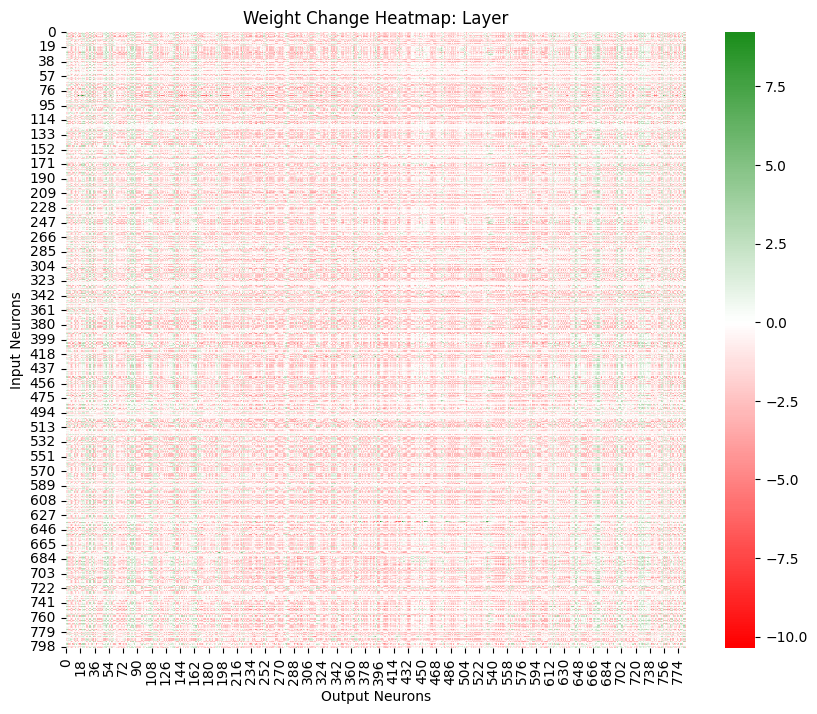

In [26]:
from visualize import visualize_weight_change

visualize_weight_change(weights_before=trained_ms[1].fc1.weight, weights_after=mu_ms[1].fc1.weight)

### Layer-wise Distance

In [27]:
from metrics import model_layer_wise_difference
lw_dist = {}
for t, mu in zip(trained_ms.values(), mu_ms.values()):
    new = model_layer_wise_difference(t, mu)
    if len(lw_dist) == 0:
        for name in new.keys():
            lw_dist[name] = []
    for name in new.keys():
        lw_dist[name].append(new[name])
for key in lw_dist.keys():
    lw_dist[key] = sum(lw_dist[key])/len(lw_dist[key])
lw_dist

{'fc1.weight': 259663.93229166666,
 'fc1.bias': 428.57786661783854,
 'fc3.weight': 2747.0851155598957,
 'fc3.bias': 22.411103630065917}

### KL-Divergence

Used to compare the difference between distribution, but may also be used to compare models by their predicted target distributions.

In [28]:
from metrics import kl_divergence_between_models, calc_mutlimodel_metric_average
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset=unlearned_data,
    batch_size=8,
    shuffle=False,
)

#### Untrained to...

In [29]:
calc_mutlimodel_metric_average(
    modeltype1=untrained_ms,
    modeltype2=mu_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

1.7817800381186648

#### Trained to...

In [30]:
calc_mutlimodel_metric_average(
    modeltype1=trained_ms,
    modeltype2=mu_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

1.2637166504339754

#### Exact to...

In [31]:
calc_mutlimodel_metric_average(
    modeltype1=exact_ms,
    modeltype2=mu_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

0.8546864303818069

#### MU to...

In [32]:
calc_mutlimodel_metric_average(
    modeltype1=mu_ms,
    modeltype2=untrained_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

7.667596188546435

In [33]:
calc_mutlimodel_metric_average(
    modeltype1=mu_ms,
    modeltype2=trained_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

2.81699533221254

In [34]:
calc_mutlimodel_metric_average(
    modeltype1=mu_ms,
    modeltype2=exact_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

2.980053335753079

### Accuracy

- $D_{Gesamt}$
- $D_{Erased}$
- $D_{Remain}$
- $D_{Accuracy Per Class}$

In [35]:
from visualize import boxplotting_multimodel_eval

accs = {}

Now, let us see what metrics each model has

Starts evaluation for 'fashion_mnist'...


Average accuracy for D_gesamt: 0.5205 - Standard Deviation for D_gesamt: 0.0769


Average accuracy for D_remain: 0.5258 - Standard Deviation for D_remain: 0.0787


Average accuracy for 0: 0.2425 - Standard Deviation for 0: 0.3230


Average accuracy for 1: 0.9042 - Standard Deviation for 1: 0.1714


Average accuracy for 2: 0.5198 - Standard Deviation for 2: 0.4793


Average accuracy for 3: 0.4065 - Standard Deviation for 3: 0.3072


Average accuracy for 4: 0.2130 - Standard Deviation for 4: 0.3816


Average accuracy for 6: 0.0688 - Standard Deviation for 6: 0.1795


Average accuracy for 7: 0.8463 - Standard Deviation for 7: 0.1172


Average accuracy for 8: 0.5328 - Standard Deviation for 8: 0.4281


Average accuracy for 9: 0.8180 - Standard Deviation for 9: 0.2368


Average accuracy for 5_all: 0.6533 - Standard Deviation for 5_all: 0.1045


Average accuracy for 5_remain: 0.8032 - Standard Deviation for 5_remain: 0.0797


Average accuracy for 5_erased: 0.3744 - Standard Deviation for 5_erased: 0.1872
plotting...


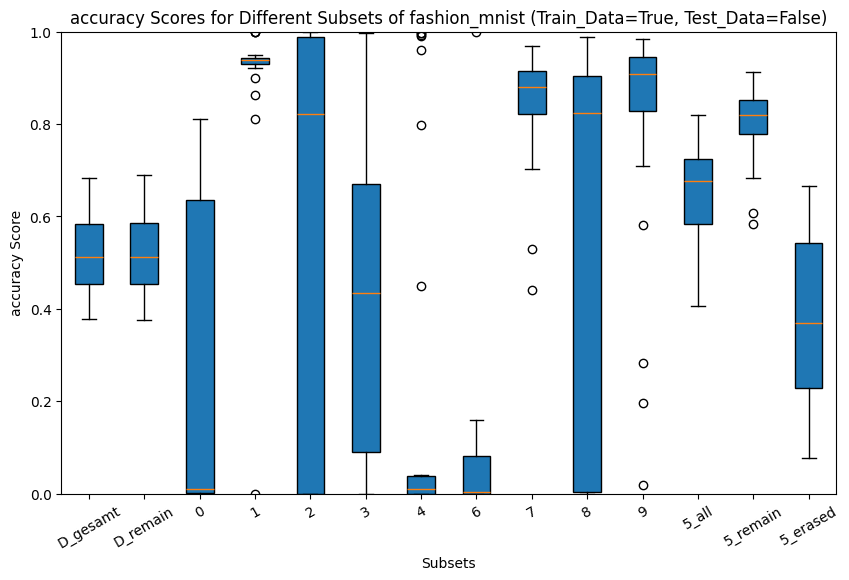

In [36]:
accs["mu_ms_train"] = boxplotting_multimodel_eval(mu_ms, dataset_name=USED_DATASET, evaluation="accuracy", train_split=True, test_split=False, logs=True)

Starts evaluation for 'fashion_mnist'...


Average accuracy for D_gesamt: 0.5166 - Standard Deviation for D_gesamt: 0.0752


Average accuracy for D_remain: 0.5218 - Standard Deviation for D_remain: 0.0770


Average accuracy for 0: 0.2354 - Standard Deviation for 0: 0.3163


Average accuracy for 1: 0.8958 - Standard Deviation for 1: 0.1705


Average accuracy for 2: 0.5181 - Standard Deviation for 2: 0.4774


Average accuracy for 3: 0.3957 - Standard Deviation for 3: 0.2997


Average accuracy for 4: 0.2127 - Standard Deviation for 4: 0.3823


Average accuracy for 6: 0.0691 - Standard Deviation for 6: 0.1799


Average accuracy for 7: 0.8492 - Standard Deviation for 7: 0.1167


Average accuracy for 8: 0.5314 - Standard Deviation for 8: 0.4266


Average accuracy for 9: 0.8209 - Standard Deviation for 9: 0.2294


Average accuracy for 5_all: 0.6376 - Standard Deviation for 5_all: 0.1051


Average accuracy for 5_remain: 0.7901 - Standard Deviation for 5_remain: 0.0763


Average accuracy for 5_erased: 0.3811 - Standard Deviation for 5_erased: 0.1839
plotting...


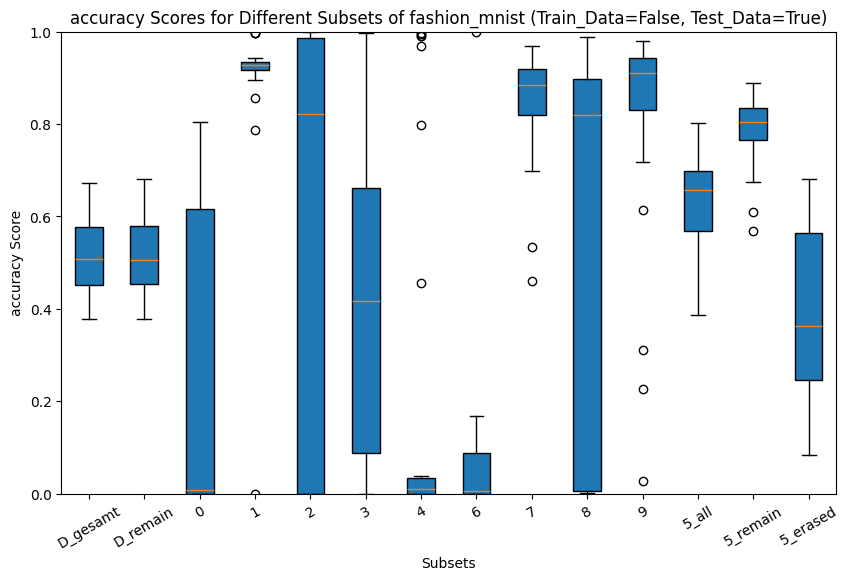

In [37]:
accs["mu_ms_test"] = boxplotting_multimodel_eval(mu_ms, dataset_name=USED_DATASET, evaluation="accuracy", train_split=False, test_split=True, logs=True)

#### Losses

In [38]:
losses = {}

Starts evaluation for 'fashion_mnist'...


Average loss for D_gesamt: 0.1563 - Standard Deviation for D_gesamt: 0.0246


Average loss for D_remain: 0.1447 - Standard Deviation for D_remain: 0.0209


Average loss for 0: 0.1944 - Standard Deviation for 0: 0.0525


Average loss for 1: 0.0637 - Standard Deviation for 1: 0.0649


Average loss for 2: 0.2074 - Standard Deviation for 2: 0.0350


Average loss for 3: 0.1726 - Standard Deviation for 3: 0.0526


Average loss for 4: 0.2101 - Standard Deviation for 4: 0.0402


Average loss for 6: 0.2261 - Standard Deviation for 6: 0.0212


Average loss for 7: 0.0579 - Standard Deviation for 7: 0.0286


Average loss for 8: 0.1516 - Standard Deviation for 8: 0.0759


Average loss for 9: 0.0672 - Standard Deviation for 9: 0.0607


Average loss for 5_all: 0.2117 - Standard Deviation for 5_all: 0.1076


Average loss for 5_remain: 0.0695 - Standard Deviation for 5_remain: 0.0224


Average loss for 5_erased: 0.4773 - Standard Deviation for 5_erased: 0.3065
plotting...


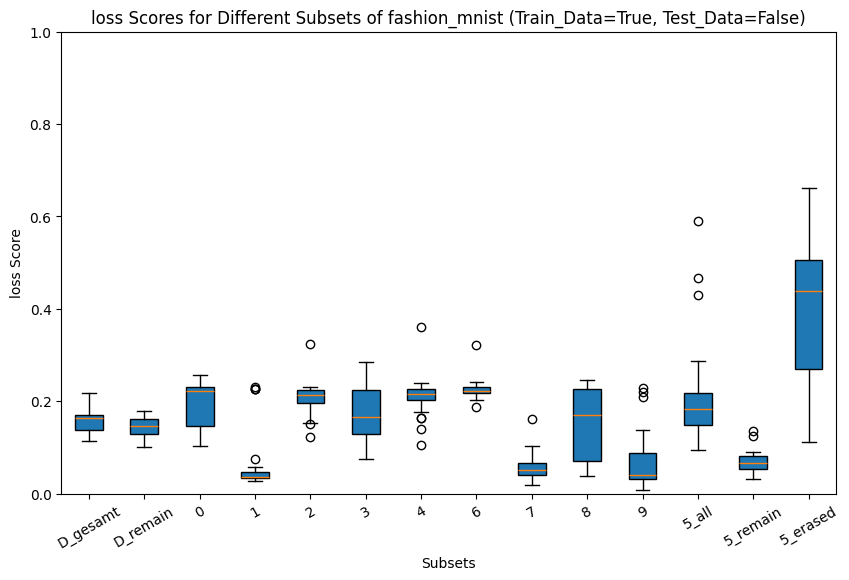

In [39]:
losses["mu_ms_train"] = boxplotting_multimodel_eval(mu_ms, dataset_name=USED_DATASET, evaluation="loss", train_split=True, test_split=False, logs=True)

Starts evaluation for 'fashion_mnist'...


Average loss for D_gesamt: 0.1604 - Standard Deviation for D_gesamt: 0.0247


Average loss for D_remain: 0.1478 - Standard Deviation for D_remain: 0.0208


Average loss for 0: 0.1968 - Standard Deviation for 0: 0.0510


Average loss for 1: 0.0699 - Standard Deviation for 1: 0.0654


Average loss for 2: 0.2110 - Standard Deviation for 2: 0.0363


Average loss for 3: 0.1768 - Standard Deviation for 3: 0.0512


Average loss for 4: 0.2100 - Standard Deviation for 4: 0.0390


Average loss for 6: 0.2298 - Standard Deviation for 6: 0.0269


Average loss for 7: 0.0554 - Standard Deviation for 7: 0.0299


Average loss for 8: 0.1596 - Standard Deviation for 8: 0.0763


Average loss for 9: 0.0649 - Standard Deviation for 9: 0.0584


Average loss for 5_all: 0.2299 - Standard Deviation for 5_all: 0.1152


Average loss for 5_remain: 0.0769 - Standard Deviation for 5_remain: 0.0214


Average loss for 5_erased: 0.4909 - Standard Deviation for 5_erased: 0.3108
plotting...


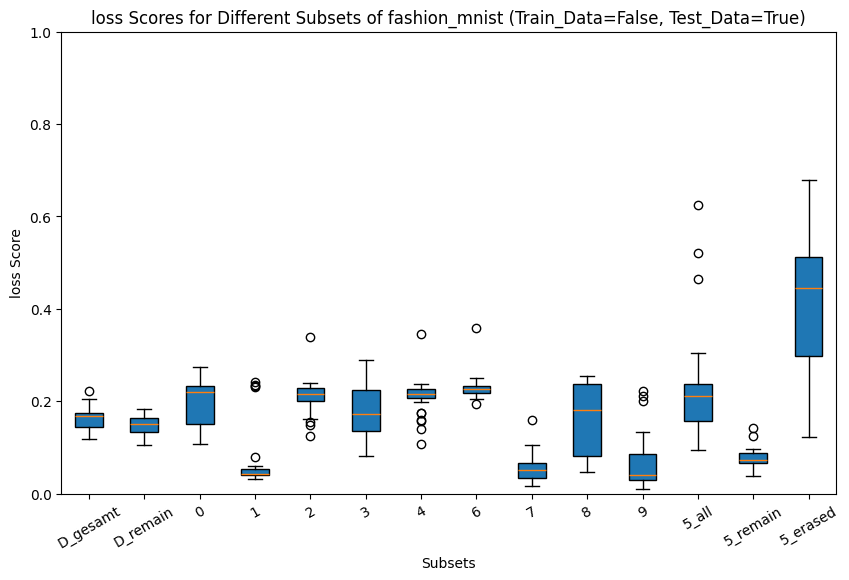

In [40]:
losses["mu_ms_test"] = boxplotting_multimodel_eval(mu_ms, dataset_name=USED_DATASET, evaluation="loss", train_split=False, test_split=True, logs=True)